# Crypto Time Series

Using Time Series models to predict the price of crypto currency

## Imports

Adding necessary dependencies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

Import helper functions.

In [34]:
from src.utils import fileValidation

Import datasets


In [35]:
DATASET_PATH = ".data"
TRAINING_SET_FILE_NAME = "training.csv"
TEST_SET_FILE_NAME = "test.csv"
REQUIRED_TAGS = {"Start", "Open"}

Verify files exist

In [36]:
print("Training set validated:", fileValidation(DATASET_PATH, TRAINING_SET_FILE_NAME))
print("Test set validated:", fileValidation(DATASET_PATH, TEST_SET_FILE_NAME))

Training set validated: False
Test set validated: False


In [37]:
trainingSet = pd.read_csv("./data/training.csv")
testSet = pd.read_csv("./data/test.csv")

### Test Plotting

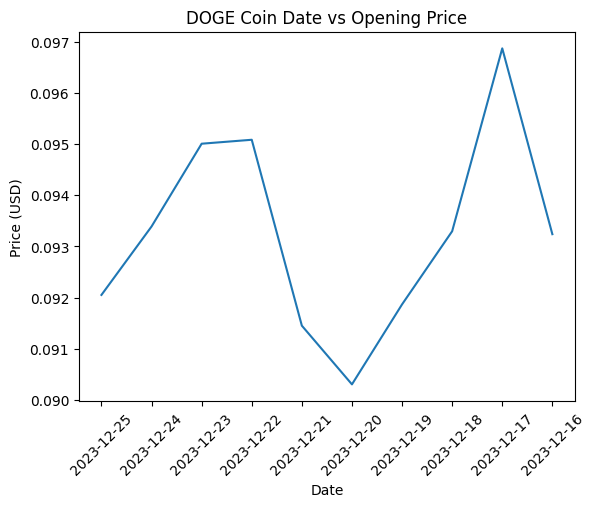

In [38]:
plt.plot(trainingSet["Start"].head(10), trainingSet["Open"].head(10))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("DOGE Coin Date vs Opening Price")
plt.show()

## Model Set-up

Check for null values in data set.

In [61]:
print(f"Training Set contains null values:\n{pd.isnull(trainingSet).sum()}\n")
print(f"Test Set contains null values:\n{pd.isnull(testSet).sum()}")

Training Set contains null values:
Start     0
End       0
Open      0
High      0
Low       0
Close     0
Volume    0
Market    0
dtype: int64

Test Set contains null values:
Start     0
End       0
Open      0
High      0
Low       0
Close     0
Volume    0
Market    0
dtype: int64


Get a visual of the data.

In [62]:
trainingSet.head(10)

,Start,End,Open,High,Low,Close,Volume,Market
0,2023-12-25,2023-12-26,0.092051,0.095037,0.091498,0.094485,1.077965e+09,1.329475e+10
1,2023-12-24,2023-12-25,0.093388,0.094880,0.091306,0.091973,9.541196e+08,1.334397e+10
2,2023-12-23,2023-12-24,0.095005,0.095063,0.092446,0.093617,1.065053e+09,1.326638e+10
3,2023-12-22,2023-12-23,0.095082,0.095593,0.092370,0.095371,2.052964e+09,1.336809e+10
4,2023-12-21,2023-12-22,0.091451,0.097270,0.090789,0.095000,1.297428e+09,1.315688e+10
5,2023-12-20,2023-12-21,0.090304,0.093312,0.089716,0.091486,1.151627e+09,1.298105e+10
6,2023-12-19,2023-12-20,0.091867,0.093415,0.089627,0.090325,1.223384e+09,1.306315e+10
7,2023-12-18,2023-12-19,0.093295,0.093700,0.087224,0.092020,1.296229e+09,1.290076e+10
8,2023-12-17,2023-12-18,0.096867,0.097684,0.092618,0.093080,1.177680e+09,1.350345e+10
9,2023-12-16,2023-12-17,0.093238,0.097108,0.092159,0.097108,1.099513e+09,1.341913e+10


Check if dataset is stationary

In [63]:
adfullerResult = adfuller(trainingSet["Close"])
print(f"ADF Statistic: {adfullerResult[0]}")
print(f"p-value: {adfullerResult[1]}")
print(f"Critical Values: {adfullerResult[4].values()}")

ADF Statistic: -2.4877635875316733
p-value: 0.11848003424232662
Critical Values: dict_values([np.float64(-3.4339881389288407), np.float64(-2.863147035877915), np.float64(-2.567625533641975)])


Since ADF Value is greater than the Critical Values, and the P-value is greater than the .05 threshold, we can cannot reject the null hypothesis.

Therefore, the dataset is not stationary.